# ANALISIS EXPLORATORIO DE DATOS - MODULO 3
# AUTOR : CÉSAR MAYTA
DATASET : [kaggle](https://www.kaggle.com/datasets/raminhuseyn/dataset-from-tiktok)

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("raminhuseyn/dataset-from-tiktok")
file = '/tiktok_dataset.csv'

path_file = path + file

print("Path to dataset files:", path_file)


Path to dataset files: /root/.cache/kagglehub/datasets/raminhuseyn/dataset-from-tiktok/versions/1/tiktok_dataset.csv


In [ ]:
!ls /root/.cache/kagglehub/datasets/raminhuseyn/dataset-from-tiktok/versions/1

tiktok_dataset.csv


# IMPORTACIÓN DE LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# APARIENCIA DE GRAFICOS

In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

# CARGA DE DATASET

In [27]:
tiktok_df = pd.read_csv(path_file)
tiktok_df.head(2)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0


# 1 - VALIDACIÓN DE DATOS Y ANALISIS DE NULOS

## 1.1 TIPOS DE DATOS Y CANTIDAD DE REGISTROS Y VARIABLES

In [ ]:
tiktok_df.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


In [ ]:
tiktok_df.dtypes.value_counts()

,count
float64,5
object,4
int64,3


In [ ]:
tiktok_df.shape

(19382, 12)

## 1.2 ANALISIS DE VALORES NULOS

In [ ]:
tiktok_df.isnull().any()

,0
#,False
claim_status,True
video_id,False
video_duration_sec,False
video_transcription_text,True
verified_status,False
author_ban_status,False
video_view_count,True
video_like_count,True
video_share_count,True


In [ ]:
tiktok_df.isnull().sum().sort_values(ascending=False)

,0
claim_status,298
video_transcription_text,298
video_view_count,298
video_like_count,298
video_share_count,298
video_download_count,298
video_comment_count,298
#,0
video_id,0
video_duration_sec,0


In [ ]:
plot_null_tiktok = tiktok_df.isnull().melt(value_name='missing')
plot_null_tiktok

,variable,missing
0,#,False
1,#,False
2,#,False
3,#,False
4,#,False
...,...,...
232579,video_comment_count,True
232580,video_comment_count,True
232581,video_comment_count,True
232582,video_comment_count,True


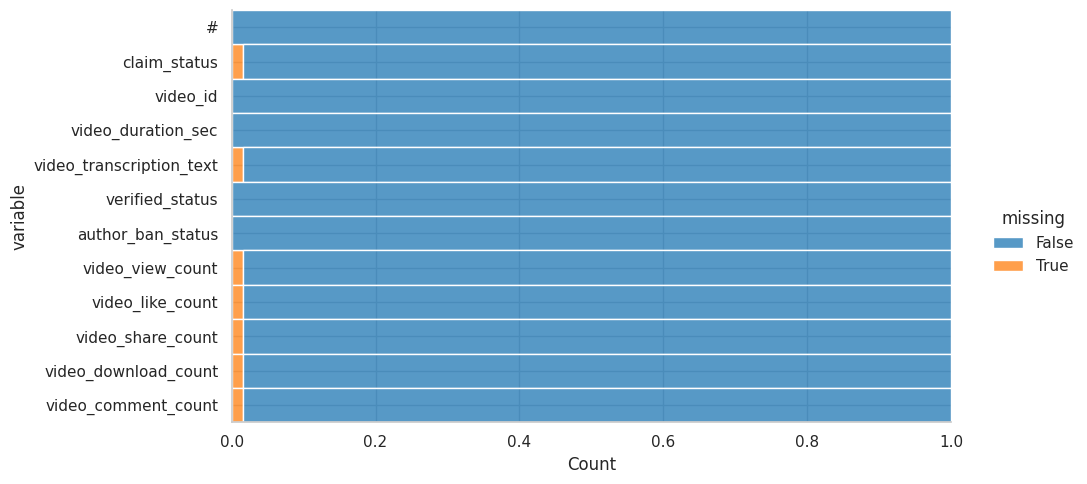

In [ ]:
sns.displot(data=plot_null_tiktok,y='variable',hue='missing',aspect=2,multiple='fill')

<Axes: >

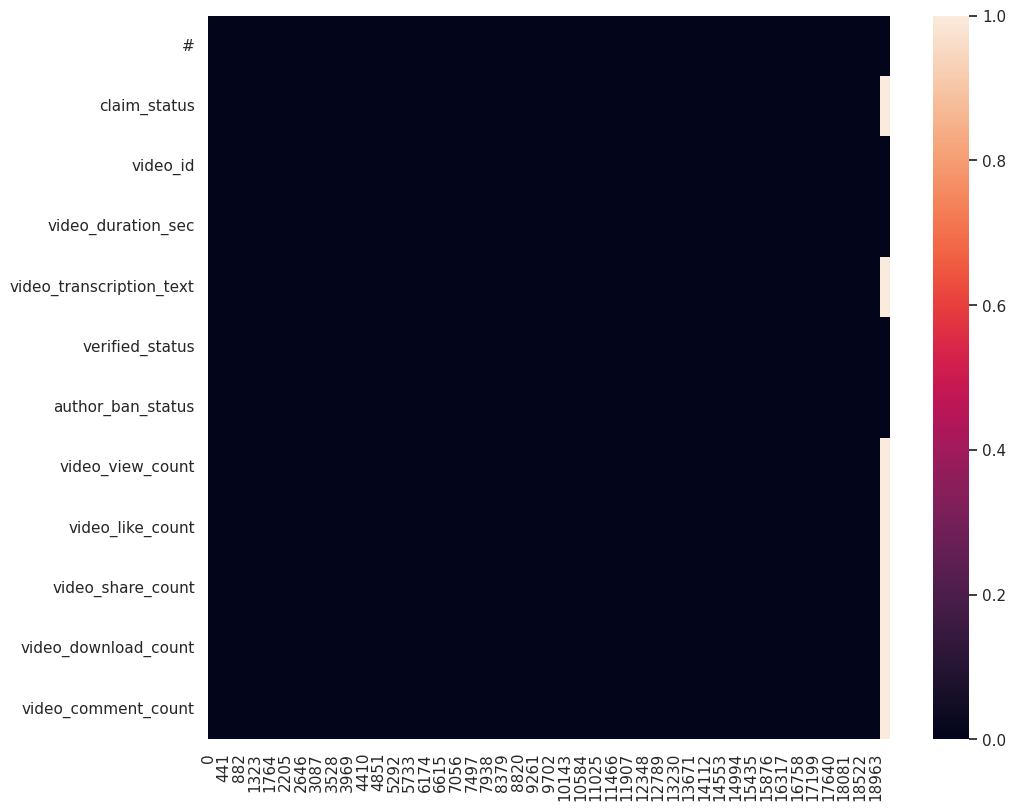

In [ ]:
(
    tiktok_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

### ¿ CUANTOS VALORES PERDERE SI ELIMINO LOS NULOS?

In [ ]:
tiktok_df.shape[0]

19382

In [ ]:
tiktok_df.dropna().shape[0]

19084

In [ ]:
int(tiktok_df.shape[0]) - int(tiktok_df.dropna().shape[0])

298

### ELIMINAMOS LOS VALORES NULOS

In [28]:
tiktok_df.dropna(inplace=True)
tiktok_df.isnull().sum().sum()

0

# 2 FILTRADO DE DATOS PARA UN MEJOR ANALISIS

In [29]:
tiktok_df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [30]:
tiktok_df.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


In [33]:
tiktok_df.author_ban_status.value_counts()

,count
author_ban_status,
active,15383
under review,2066
banned,1635


In [36]:
tiktok_processed_df = tiktok_df.drop(columns=['#','video_id','video_transcription_text']).copy()
tiktok_processed_df.dtypes

,0
claim_status,object
video_duration_sec,int64
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64
video_download_count,float64
video_comment_count,float64


# 3  CORRELACIONES

## 3.1 CORRELACIÓN DE VARIABLES NÚMERICAS

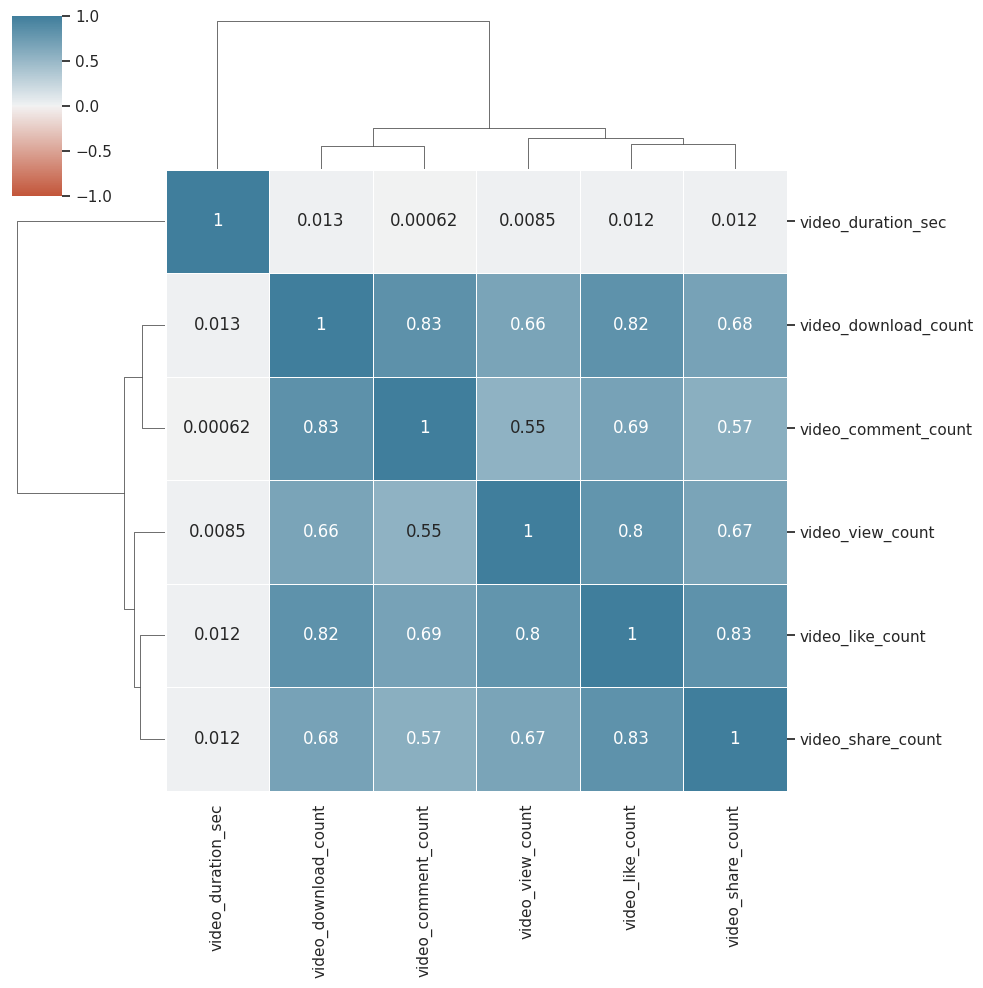

In [37]:
sns.clustermap(
    data=tiktok_processed_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

## 3.2 CORRELACIÓN CON VARIABLES CATEGORICAS

In [38]:
print(tiktok_processed_df['claim_status'].unique())
print(tiktok_processed_df['verified_status'].unique())
print(tiktok_processed_df['author_ban_status'].unique())

['claim' 'opinion']
['not verified' 'verified']
['under review' 'active' 'banned']


In [40]:
tiktok_processed_df = (
    tiktok_processed_df
    .assign(
        numeric_claim_status=lambda df: df.claim_status.replace(tiktok_processed_df['claim_status'].unique(),[0,1]),
        numeric_verified_status=lambda df: df.verified_status.replace(tiktok_processed_df['verified_status'].unique(),[0,1]),
        numeric_author_ban_status= lambda df: df.author_ban_status.replace(tiktok_processed_df['author_ban_status'].unique(),[0,1,2])
    )
)
tiktok_processed_df

<ipython-input-40-6442cee16895>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_claim_status=lambda df: df.claim_status.replace(tiktok_processed_df['claim_status'].unique(),[0,1]),
<ipython-input-40-6442cee16895>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_verified_status=lambda df: df.verified_status.replace(tiktok_processed_df['verified_status'].unique(),[0,1]),
<ipython-input-40-6442cee16895>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,numeric_claim_status,numeric_verified_status,numeric_author_ban_status
0,claim,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0,0,0
1,claim,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0,0,1
2,claim,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0,0,1
3,claim,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0,0,1
4,claim,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19079,opinion,49,not verified,active,6067.0,423.0,81.0,8.0,2.0,1,0,1
19080,opinion,23,not verified,active,2973.0,820.0,70.0,3.0,0.0,1,0,1
19081,opinion,50,not verified,active,734.0,102.0,7.0,2.0,1.0,1,0,1
19082,opinion,8,not verified,active,3394.0,655.0,123.0,11.0,4.0,1,0,1


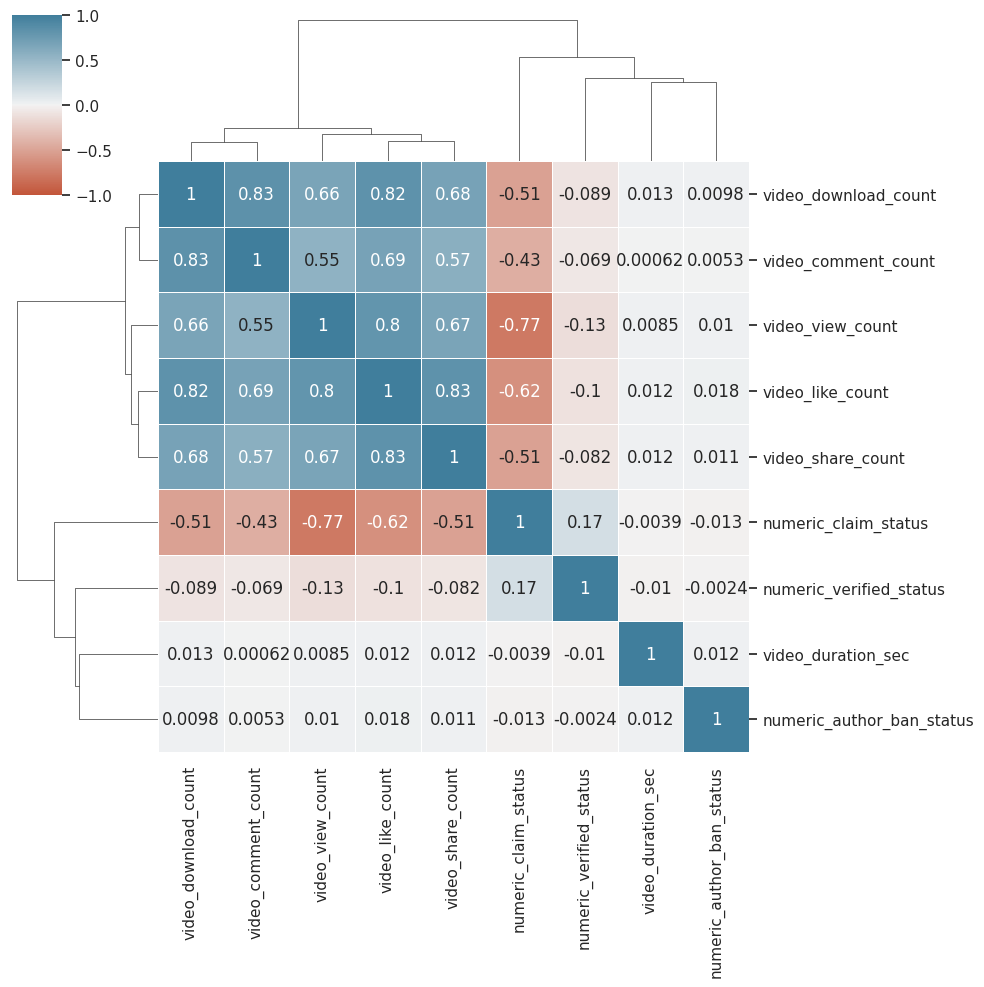

In [41]:
sns.clustermap(
    data=tiktok_processed_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

# 4 MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN

## 4.1 TENDENCIA CENTRAL

In [45]:
tiktok_processed_df.isnull().sum().sum()

0

In [42]:
tiktok_processed_df.mean(numeric_only=True)

,0
video_duration_sec,32.423811
video_view_count,254708.558688
video_like_count,84304.636030
video_share_count,16735.248323
video_download_count,1049.429627
video_comment_count,349.312146
numeric_claim_status,0.496542
numeric_verified_status,0.062880
numeric_author_ban_status,0.977416


In [43]:
tiktok_processed_df.median(numeric_only=True)

,0
video_duration_sec,32.0
video_view_count,9954.5
video_like_count,3403.5
video_share_count,717.0
video_download_count,46.0
video_comment_count,9.0
numeric_claim_status,0.0
numeric_verified_status,0.0
numeric_author_ban_status,1.0


In [46]:
tiktok_processed_df.mode(numeric_only=True)

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,numeric_claim_status,numeric_verified_status,numeric_author_ban_status
0,6.0,2562.0,32.0,2.0,0.0,0.0,0.0,0.0,1.0
1,NaN,7393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4.2 DISPERSIÓN

In [47]:
tiktok_processed_df.min(numeric_only=True)

,0
video_duration_sec,5.0
video_view_count,20.0
video_like_count,0.0
video_share_count,0.0
video_download_count,0.0
video_comment_count,0.0
numeric_claim_status,0.0
numeric_verified_status,0.0
numeric_author_ban_status,0.0


In [48]:
tiktok_processed_df.max(numeric_only=True)

,0
video_duration_sec,60.0
video_view_count,999817.0
video_like_count,657830.0
video_share_count,256130.0
video_download_count,14994.0
video_comment_count,9599.0
numeric_claim_status,1.0
numeric_verified_status,1.0
numeric_author_ban_status,2.0


In [49]:
tiktok_processed_df.std(numeric_only=True)

,0
video_duration_sec,16.226470
video_view_count,322893.280814
video_like_count,133420.546814
video_share_count,32036.174350
video_download_count,2004.299894
video_comment_count,799.638865
numeric_claim_status,0.500001
numeric_verified_status,0.242753
numeric_author_ban_status,0.439809


In [50]:
(tiktok_processed_df
 .quantile(q=[0.25,0.50,0.75],numeric_only=True)
 .transpose()
 .rename_axis('metric')
 .reset_index()
 .assign(iqr = lambda df: df[0.75] - df[0.25])
 )

,metric,0.25,0.5,0.75,iqr
0,video_duration_sec,18.00,32.0,47.00,29.00
1,video_view_count,4942.50,9954.5,504327.00,499384.50
2,video_like_count,810.75,3403.5,125020.00,124209.25
3,video_share_count,115.00,717.0,18222.00,18107.00
4,video_download_count,7.00,46.0,1156.25,1149.25
5,video_comment_count,1.00,9.0,292.00,291.00
6,numeric_claim_status,0.00,0.0,1.00,1.00
7,numeric_verified_status,0.00,0.0,0.00,0.00
8,numeric_author_ban_status,1.00,1.0,1.00,0.00


## 4.3 GRAFICA DE MEDIDAS CENTRALES Y DIPSERSIÓN DE LA VARIABLE video_duration_sec

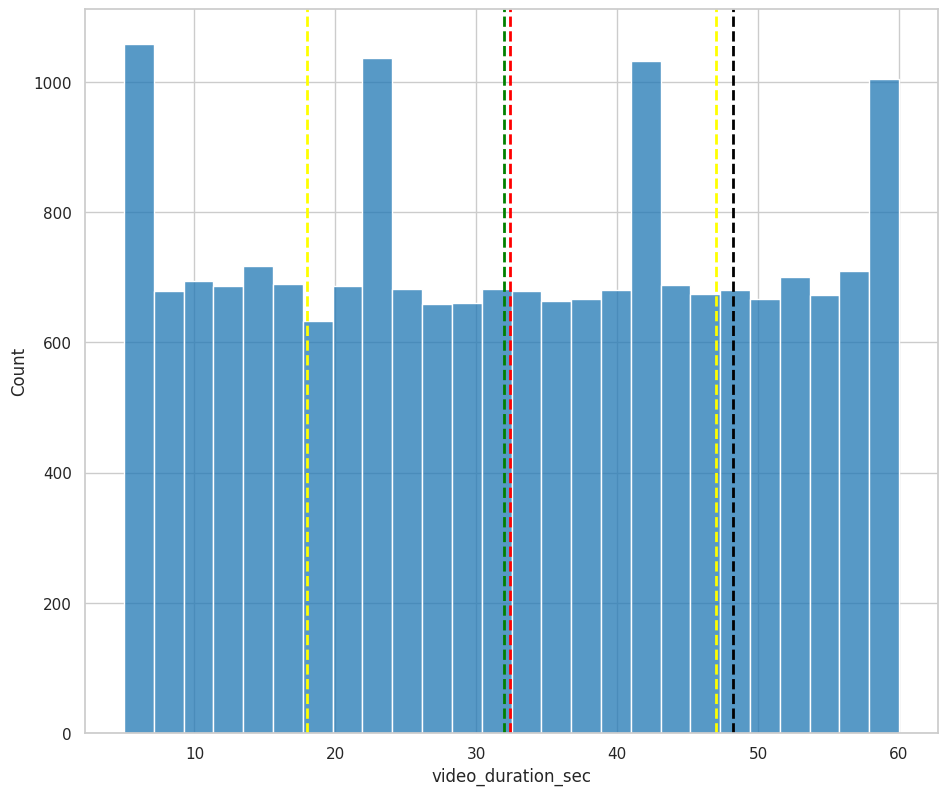

In [53]:
df = tiktok_processed_df
variable = 'video_duration_sec'
sns.histplot(
    data=df,
    x=variable
)
plt.axvline(
    x=df[variable].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median() +df[variable].std(),
    color='black',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

# 5 CONTEOS Y PROPORCIONES

In [55]:
tiktok_processed_df.describe()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,numeric_claim_status,numeric_verified_status,numeric_author_ban_status
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146,0.496542,0.062880,0.977416
std,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865,0.500001,0.242753,0.439809
min,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000,0.000000,0.000000,1.000000
50%,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000,0.000000,0.000000,1.000000
75%,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000,1.000000,0.000000,1.000000
max,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000,1.000000,1.000000,2.000000


In [56]:
tiktok_processed_df.describe(include=object)

,claim_status,verified_status,author_ban_status
count,19084,19084,19084
unique,2,2,3
top,claim,not verified,active
freq,9608,17884,15383


## 5.1 CONTEO DE CLAIM STATUS

In [57]:
claim_color = {
    'claim':'#ff6602ff',
    'opinion':'#0f7175ff'
}


<Axes: xlabel='claim_status'>

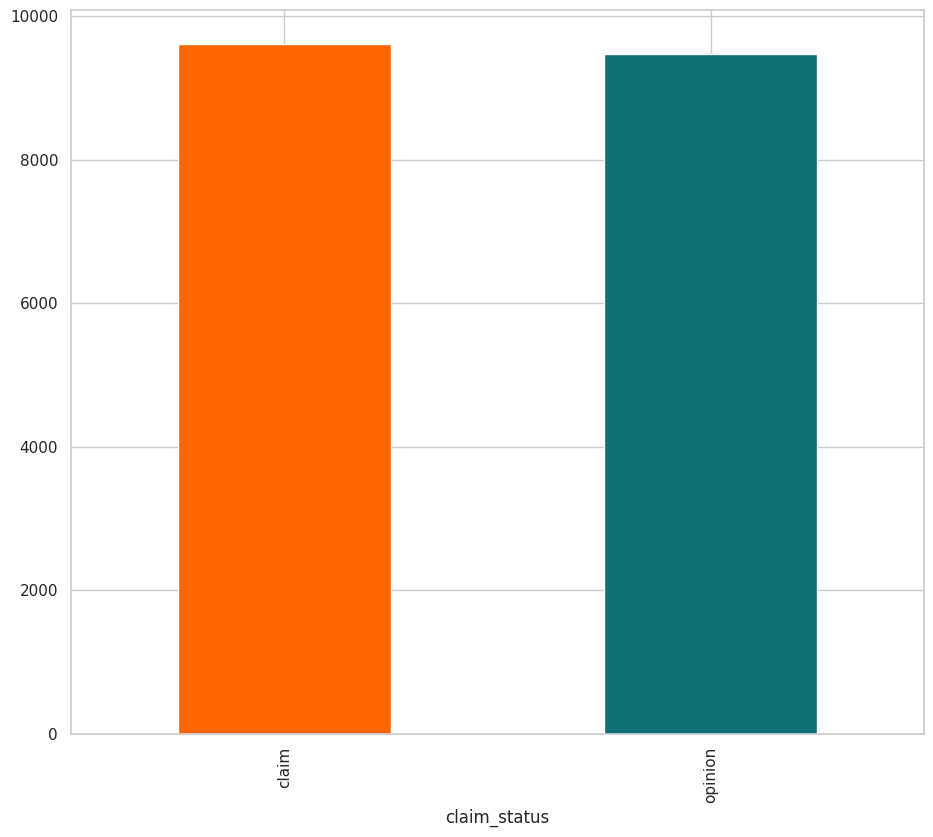

In [58]:
(
    tiktok_processed_df
    .claim_status
    .value_counts()
    .plot(
        kind='bar',
        color=claim_color.values()
    )
)

## 5.2 PROPORCIONES DE CLAIM STATUS

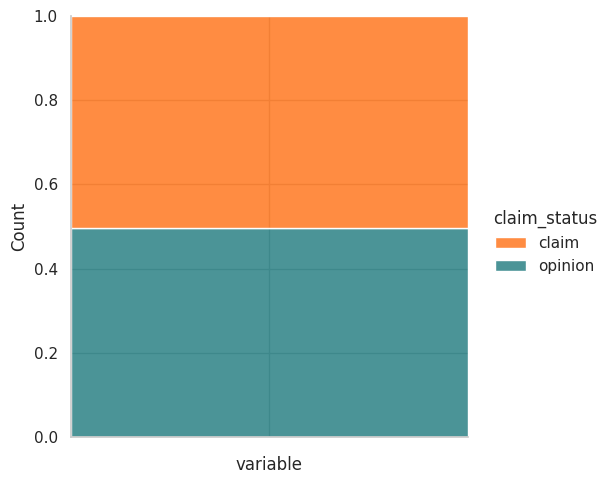

In [59]:
tiktok_processed_df['variable'] = ''
(
    tiktok_processed_df
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='claim_status',
                multiple='fill',
                palette=claim_color
            )
        )
    )
)

# 6 ANALISIS BIVARIADO

<Axes: xlabel='video_like_count', ylabel='video_share_count'>

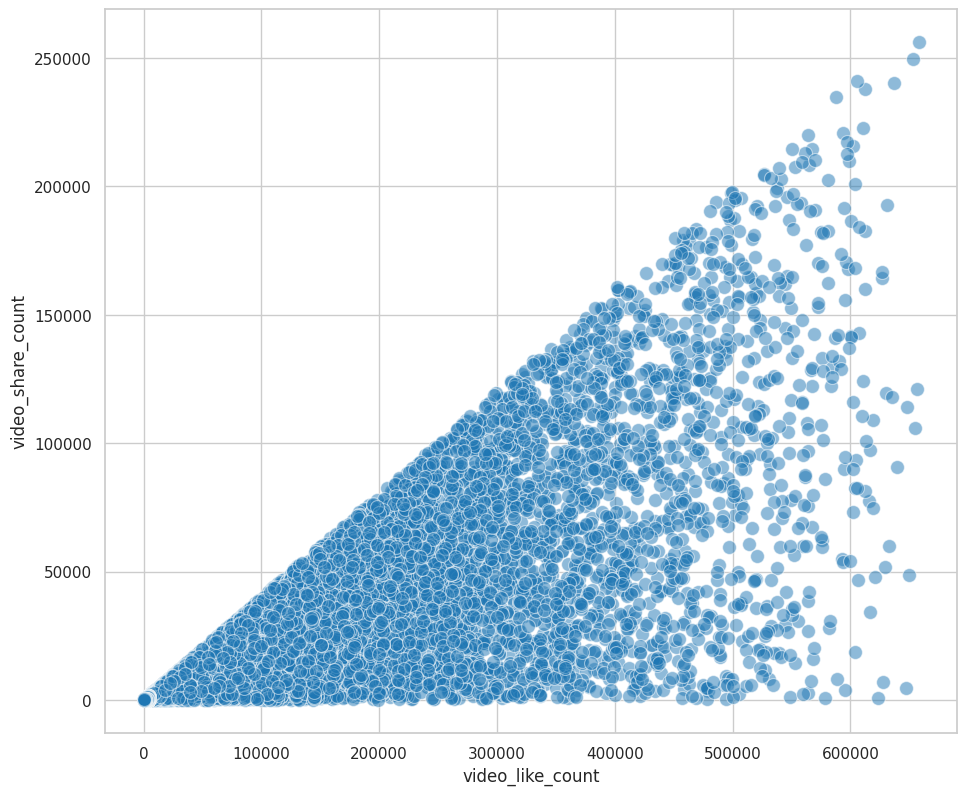

In [60]:
sns.scatterplot(
    data=tiktok_processed_df,
    x='video_like_count',
    y='video_share_count',
    alpha=1/2,
    s=100
)

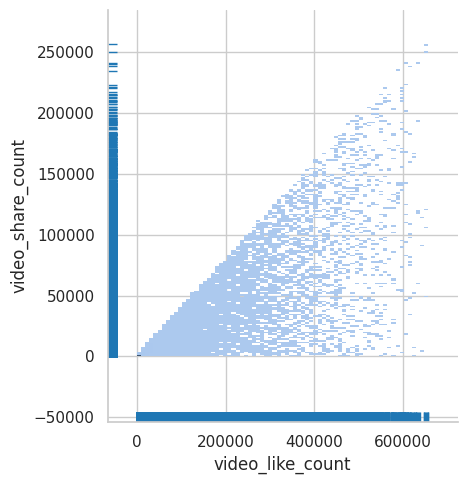

In [61]:
sns.displot(
    data=tiktok_processed_df,
    x='video_like_count',
    y='video_share_count',
    rug=True
)

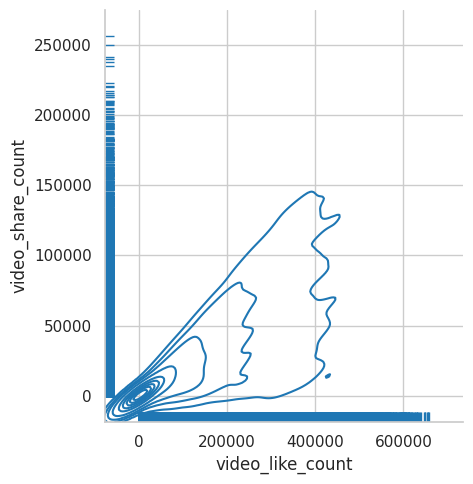

In [62]:
sns.displot(
    data=tiktok_processed_df,
    x='video_like_count',
    y='video_share_count',
    kind='kde',
    rug=True
)

## 6.1 RELACIÓN ENTRE CATEGORICOS Y NÚMERICOS

<Axes: xlabel='verified_status', ylabel='video_like_count'>

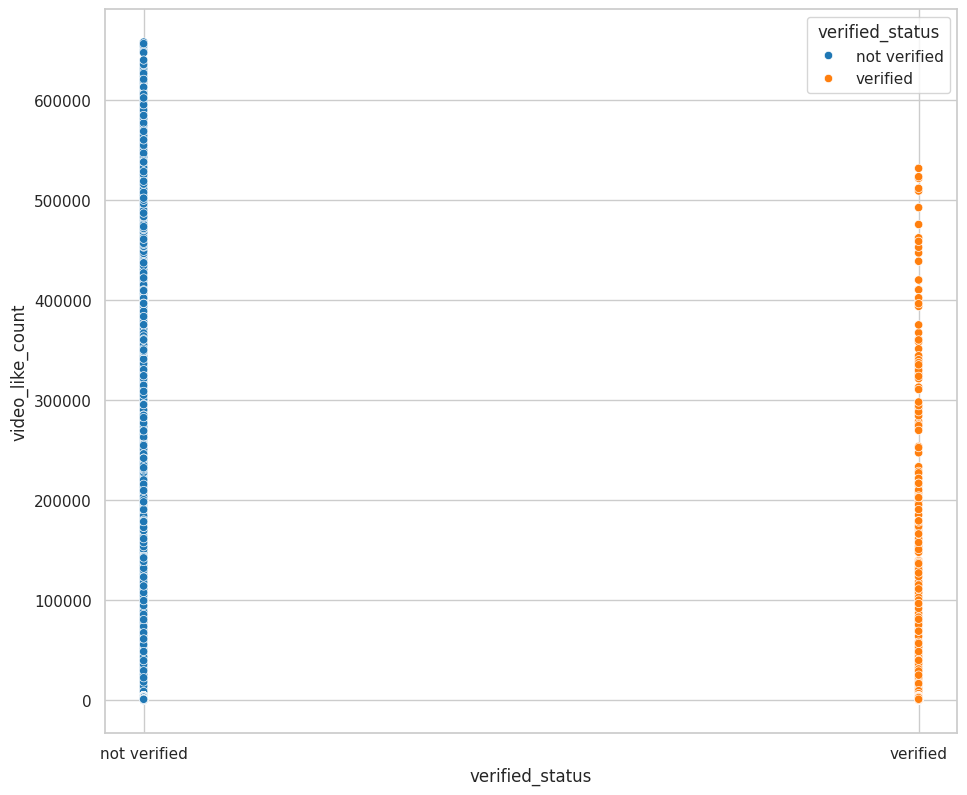

In [64]:
sns.scatterplot(
    data=tiktok_processed_df,
    x='verified_status',
    y='video_like_count',
    hue='verified_status'
)

<Axes: xlabel='verified_status', ylabel='video_like_count'>

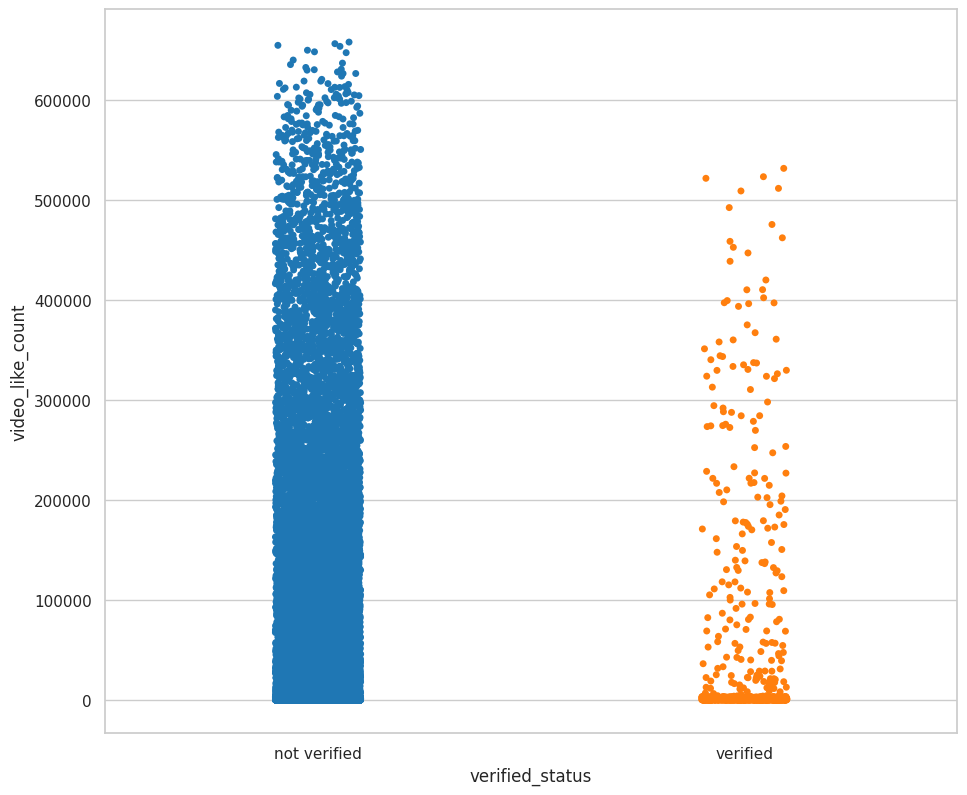

In [65]:
sns.stripplot(
    data=tiktok_processed_df,
    x='verified_status',
    y='video_like_count',
    hue='verified_status'
)

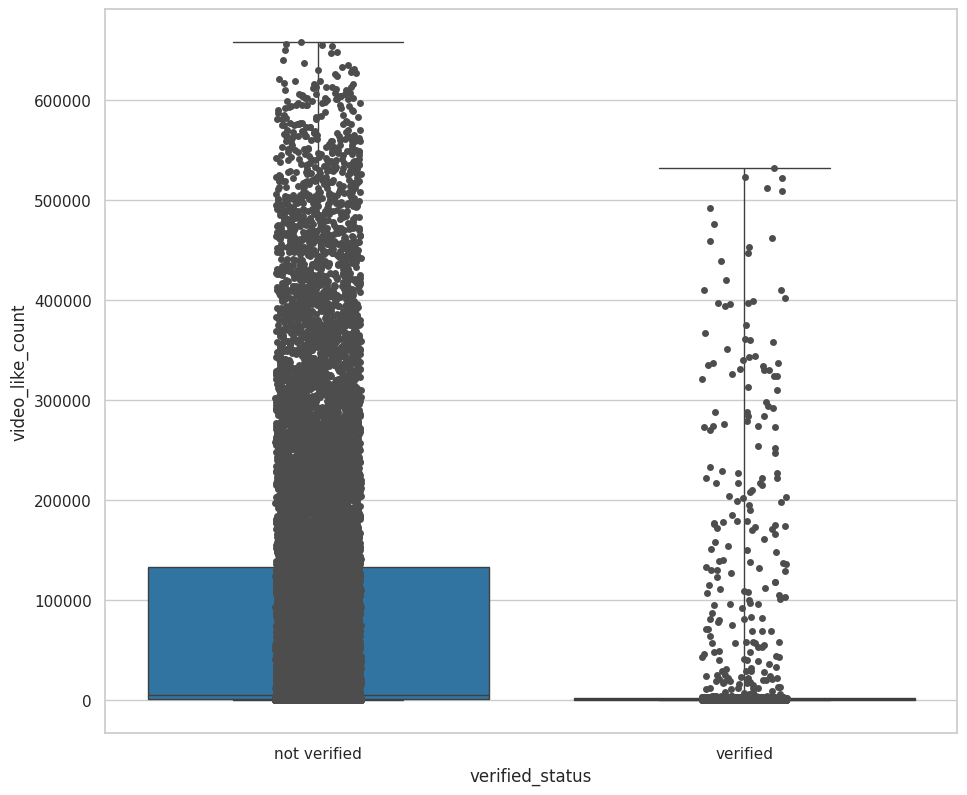

In [67]:
ax = sns.boxplot(
    data=tiktok_processed_df,
    x='verified_status',
    y='video_like_count',
    whis=np.inf
)

ax = sns.stripplot(
    data=tiktok_processed_df,
    x='verified_status',
    y='video_like_count',
    color='.3'
)